In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

def plot_energy_consumption_trends(db_path="database.db"):
    # Plot styling
    plt.style.use('ggplot')
    sns.set_palette("Blues")

    # Connect to the database
    conn = sqlite3.connect(db_path)

    try:
        # ---------------- REAL-TIME ENERGY VISUALIZATION ----------------
        realtime_query = """
        SELECT timestamp, SUM(power_consumption) AS total_power
        FROM real_time_energy_readings
        GROUP BY timestamp
        ORDER BY timestamp
        """
        realtime_df = pd.read_sql_query(realtime_query, conn)
        realtime_df['timestamp'] = pd.to_datetime(realtime_df['timestamp'])
        realtime_df['moving_avg'] = realtime_df['total_power'].rolling(window=5).mean()

        # Plot real-time energy consumption
        plt.figure(figsize=(14, 6))
        plt.plot(realtime_df['timestamp'], realtime_df['total_power'],
                 color=sns.color_palette("Blues", 1)[0], alpha=0.8, linewidth=2, label='Real-Time Consumption')
        plt.plot(realtime_df['timestamp'], realtime_df['moving_avg'],
                 color='orange', alpha=0.8, linewidth=2, label='5-Min Moving Average')
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a %H:%M'))
        plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
        plt.xticks(rotation=45)
        plt.title("Real-Time Total Energy Consumption", fontsize=16)
        plt.xlabel("Time", fontsize=12)
        plt.ylabel("Power Consumption (W)", fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show()

        # ---------------- HISTORICAL ENERGY VISUALIZATION ----------------
        historical_query = """
        SELECT timestamp, SUM(power_consumption) AS total_power
        FROM historical_energy_readings
        GROUP BY timestamp
        ORDER BY timestamp
        """
        hist_df = pd.read_sql_query(historical_query, conn)
        hist_df['timestamp'] = pd.to_datetime(hist_df['timestamp'])
        hist_df['moving_avg'] = hist_df['total_power'].rolling(window=7).mean()

        # Plot historical energy consumption
        plt.figure(figsize=(14, 6))
        plt.plot(hist_df['timestamp'], hist_df['total_power'],
                 color=sns.color_palette("Blues", 1)[0], alpha=0.8, linewidth=2, label='Historical Consumption')
        plt.plot(hist_df['timestamp'], hist_df['moving_avg'],
                 color='red', alpha=0.8, linewidth=2, label='7-Day Moving Average')
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a %H:%M'))
        plt.gca().xaxis.set_major_locator(mdates.DayLocator())
        plt.xticks(rotation=45)
        plt.title("Historical Total Energy Consumption", fontsize=16)
        plt.xlabel("Time", fontsize=12)
        plt.ylabel("Power Consumption (W)", fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show()

    finally:
        conn.close()

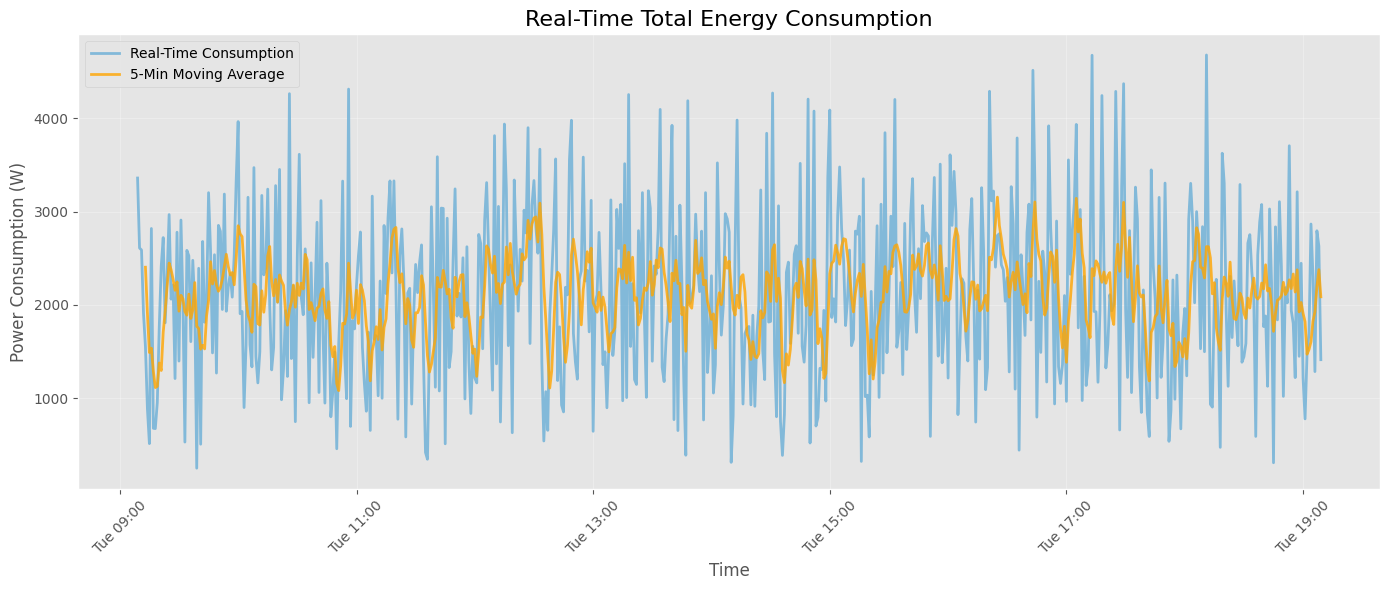

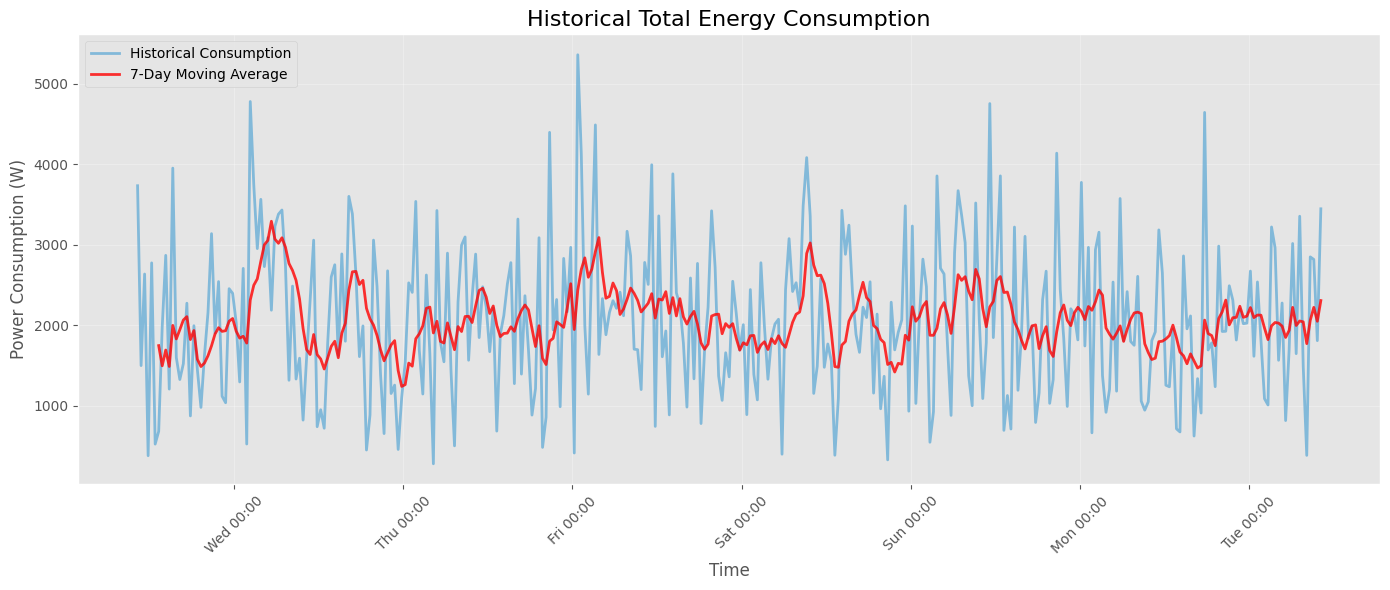

In [2]:
plot_energy_consumption_trends()